# **Stack, Queue, Dequeue**

*   데이터 값을 저장하는 기본적인 구조, 일차원 선형 자료구조
*   **규칙에 맞춰** 값을 리스트에 저장하고 꺼내는 연산

> **Stack (Last in First out)** : 가장 최근에 저장된 값이 가장 먼저 나간다.

> **Queue (First in First out)** : 가장 먼저 저장된 값이 가장 먼저 나간다.

> **Dequeue (Stack + Queue)** : stack과 queue의 연산을 모두 지원하는 자료구조.










## **Stack**


1.  **Last in First out**의 규칙을 따르는 리스트의 형태
2.   연산: push, pop, top, isEmpty, size(len) 등 5가지 연산 제공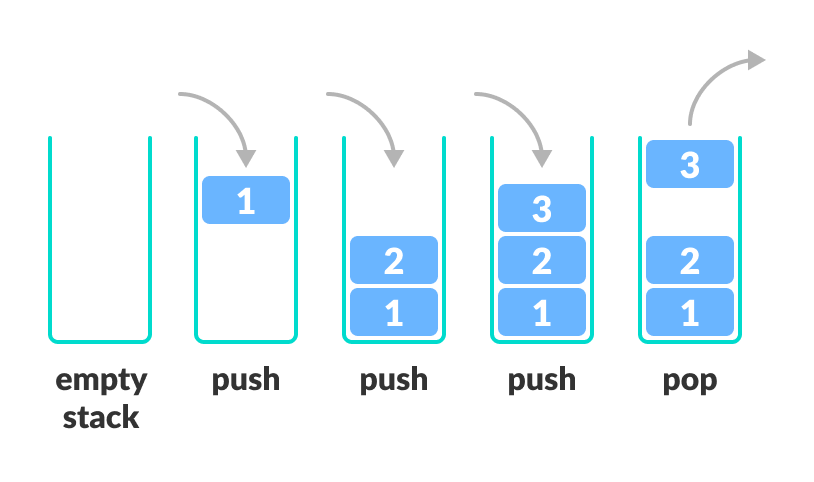

**기본 세팅**

In [4]:
# stack_queue.py
class Stack:

    # 데이터 저장을 위한 빈 리스트를 준비
    def __init__(self):
        self.items = []

    # 삽입 연산
    def push(self, val):
        self.items.append(val)

    # 삭제 연산
    def pop(self):
        try:
            return self.items.pop()
        except IndexError:
            print("Stack is empty")

    # 가장 최근에 저장된 값
    def top(self):
        try:
            return self.items[-1]
        except IndexError:
            print("Stack is empty")

    # stack의 길이(len)
    def __len__(self):
        return len(self.items)

    # 비어있는지에 대한 여부
    def isEmpty(self):
        return len(self) == 0


**엄밀한 세팅(최대 크기를 정해둔 리스트)**

In [ ]:
class Stack:
    def __init__(self, max_size):
        self.items = [None] * max_size # 사이즈를 미리 선언
        self.idx = -1

    def push(self, val):
        if self.idx+1 == len(self):
            print("Stack is full")
            return
        self.idx += 1
        self.items[self.idx] = val

    def pop(self, val):
        if self.idx == -1:
            print("Stack is empty")
            return None
        top_item = self.items[self.idx]
        self.idx -= 1
        return top_item

    def top(self):
        if self.idx == -1:
            print("Stack is empty")
            return None
        try:
            return self.items[-1]
        except IndexError:
            print("Stack is empty")

    def __len__(self):
        return len(self.items)

    def isEmpty(self):
        return len(self) == 0


### **Stack 활용 - 괄호맞추기**

1.   "("과 ")"를 입력값에 넣는다.
2.   입력된 순서대로 스택 리스트에 넣는다.
3.   이미 들어있는 "("이 새롭게 들어온 ")"를 만나면 규칙에 따라 들어온 순서대로 삭제된다.
4.   입력값이 끝날때까지 반복한다.

*   ✅ 괄호가 남아있지 않다면 성공
*   ❌ 괄호가 하나라도 있다면 실패


조금 버전을 높여서 "[", "{"도 같이 짝맞추기가 가능하다.




In [6]:
# parChecker
def parChecker(parSeq):
	s = Stack()
	for item in parSeq:
        # "("을 만나면 push
		if item == "(":
			s.push(item)
        # ")"를 만났을 때 저장된 "("를 pop
		else:
			if s.isEmpty() == True:
				return False
			else:
				s.pop()

    # 저장된 값이 없다면 True
	if s.isEmpty() == True:
		print(True)

    # 저장된 값이 있다면 False
	else:
		print(False)

parSeq = list(input())
parChecker(parSeq)

(()())
True


### **Stack 활용 - 계산기**

세 가지 함수가 사용된다.

**1.   get_token_list(expr)**

*   expr : 문자열로 수식을 나타낸다.
*   expr을 **연산자와 피연산자 토큰들로 나눠** 리스트에 담아 리턴
*   ❗ 연산자는 [+ - * / ^]의 5가지 이상 연산자만을 다루며 expr에는 공백이 존재할 수도 있다.
*   ❗ 피연산자는 float로 변환한다.
*   ❗ 피연산자가 한 자릿수가 아닐수도 있다.



**2.   infix_to_postfix(token_list)**

*   token_list : 수식의 연산자 피연산자가 infix 수식의 순서대로 저장된 리스트
*   token_list를 postfix 수식으로 변환하고 그 결과를 리스트에 담아 리턴



**3.   compute_postfix(token_list)**

*   postfix 형식의 token_list에 대해 계산


> ❗ 코드 작성자가 만들때 어려워해서 좀 복잡하게 되어있습니당...





In [7]:
# Separate
def get_token_list(expr):
	our_expr = list(expr)         # 입력받은 expr를 리스트에 넣는다.
	infix = []
	numbers = list('0123456789.') # 피연산자 리스트 (소수점 포함)
	possible = list('+-*/^() ')   # 피연산자를 제외하고 가능한 문자 리스트 (연산자, 괄호, 공백)

	i = 0
	while i < len(our_expr):
		j = 1

        # 현재 index는 피연산자이다.
		if our_expr[i] in numbers:
			while i + j < len(our_expr):
				# 다음 index가 피연산자라면 묶는다.
				if our_expr[i + j] in numbers:
					j += 1

				# 다음 index가 피연산자가 아니라면 묶지 않는다.
				else:
					break

			# 연산자 이전의 피연산자 전체를 묶음 처리해주고 해당 문자를 infix에 넣는다.
			infix.append(''.join(our_expr[i:i + j]))
			i += j

        # 현재 index는 피연산자가 아니다.
		else:
			# 쓸 수 있는 문자는 infix에 넣어준다.
			if our_expr[i] in possible:
				infix.append(our_expr[i])
				i += 1
			# 쓰지 못하는 문자는 걸러낸다.
			else:
				print(our_expr[i], "은(는) 올바르지 못한 기호입니다.")
				i += 1
				exit()
	return infix


# from infix to postfix
def infix_to_postfix(infix):
	opstack = Stack() # 연산자 구분을 위해 Stack 선언
	outstack = []     # postfix가 되어줄 리스트

	# 연산자의 우선순위 설정
	prec = {'(':0, ')':0, '+':1, '-':1, '*':2, '/':2, '^':3}

	for token in infix:
		if token == '(':
			opstack.push(token)
		elif token == ')':
			while opstack.top() != '(': # '('를 만날 때까지 opstack에서 연산자를 outstack으로 옮긴다.
				outstack.append(opstack.pop())
			opstack.pop()
		elif token in '+-/*^':
			while opstack.isEmpty() != True:
				if prec[opstack.top()] >= prec[token]: # 우선 순위에 맞춰 처리된다.
					outstack.append(opstack.pop())
				else:
					break
			opstack.push(token)
		else: # 피연산자와 공백은 그대로 outstack에 넣는다.
			outstack.append(token)

	# opstack에 남은 모든 연산자는 지우고 차례대로 outstack에 넣는다.
	while opstack.isEmpty() != True:
		outstack.append(opstack.pop())
	return outstack

# postfix 수식 계산 함수
def compute_postfix(postfix):
	process = Stack()

	for token in postfix:
		num1 = 0
		num2 = 0

        # 공백이면 무시한다.
		if token == ' ':
			continue

        # 공백이 아니라면
		else:
			process.push(token)             # Stack에 넣어준다.
			if token == '+':                # '+'의 경우
				process.pop()               # '+'를 지운다.
				num1 = float(process.pop()) # '+'이전의 피연산자 문자를 실수화 시킨다.
				num2 = float(process.pop())
				process.push(num2 + num1)   # 계산한다.
			elif token == '-':              # 반복
				process.pop()
				num1 = float(process.pop())
				num2 = float(process.pop())
				process.push(num2 - num1)
			elif token == '*':
				process.pop()
				num1 = float(process.pop())
				num2 = float(process.pop())
				process.push(num2 * num1)
			elif token == '/':
				process.pop()
				num1 = float(process.pop())
				num2 = float(process.pop())
				process.push(num2 / num1)
			elif token == '^':
				process.pop()
				num1 = float(process.pop())
				num2 = float(process.pop())
				process.push(num2 ** num1)
	return process.pop() # 최종적으로 Stack에 남아있는 정답을 return

expr = input()
value = compute_postfix(infix_to_postfix(get_token_list(expr)))
print(round(value,4))

1+3* 5.2/2
8.8


**대표 답안**

In [8]:
def get_token_list(expr):
	expr = expr.replace(' ', '')
	ch = ''
	token_list = []
	for s in expr:
		if s in '+-*/^()':
			if ch != '':
				token_list.append(ch)
			token_list.append(s)
			ch = ''
		else:
			ch += s
	if ch != '':
		token_list.append(ch)
	return token_list


def infix_to_postfix(token_list):
	opstack = Stack()
	outstack = []
	prec = {'+':3, '-':3, '*':2, '/':2, '^':1, '(':4}
	for token in token_list:
		if (token in '+-*/^()') == False:
			outstack.append(token)
		elif token == '(':
			opstack.push(token)
		elif token == ')':
			while len(opstack) != 0:
				pop = opstack.pop()
				if pop == '(':
					break
				outstack.append(pop)
		elif token in '+-*/^':
			while len(opstack) != 0:
				if prec[token] >= prec[opstack.top()]:   # 자신보다 우선순위가 높거나 같은 연산자는 차례대로 pop
					outstack.append(opstack.pop())
				else:
					break
			opstack.push(token)

	while len(opstack) != 0:
		outstack.append(opstack.pop())
	return outstack

def compute_postfix(token_list):
	numbers = Stack()
	result = 0
	for token in token_list:
		if token in '+-*/^':
			b, a = numbers.pop(), numbers.pop()
			if token == '+':
				numbers.push(a + b)
			elif token == '-':
				numbers.push(a - b)
			elif token == '*':
				numbers.push(a * b)
			elif token == '/':
				numbers.push(a / b)
			elif token == '^':
				numbers.push(a ** b)
		else:
			numbers.push(float(token))
	return numbers.pop()

expr = input()
value = compute_postfix(infix_to_postfix(get_token_list(expr)))
print(round(value,4))

(1+2) *6/5
3.6


## **Queue**

1.   **First in First out**의 규칙에 따른 리스트의 형태
2.   enqueue, dequeue, isEmpty, front, len 등의 연산
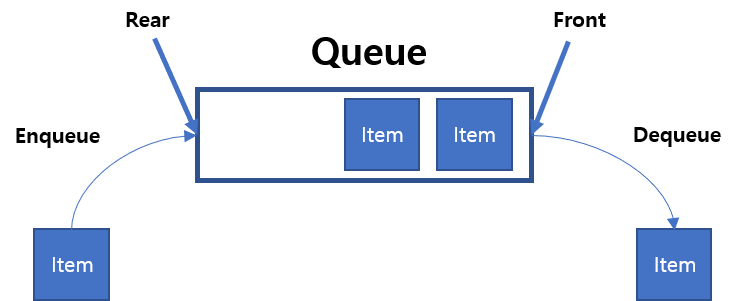

